<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [310]:
# Read CSV
df = pd.read_csv("../../DATA/Sacramento_transactions.csv")
#df = pd.read_csv("../../DATA/Sacramento_transactions.csv", na_values='0')

In [311]:
df.shape

(985, 12)

In [312]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Documentation on the data set:
> column headers are clean

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [314]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

Documentation on the data set:
> there are no NaN values

In [315]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
street,985,981,8306 CURLEW CT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,985,39,SACRAMENTO,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,985.0,NaN,NaN,NaN,95750.697462,85.176072,95603.0,95660.0,95762.0,95828.0,95864.0
state,985,1,CA,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,985.0,NaN,NaN,NaN,2.911675,1.307932,0.0,2.0,3.0,4.0,8.0
baths,985.0,NaN,NaN,NaN,1.77665,0.895371,0.0,1.0,2.0,2.0,5.0
sq__ft,985.0,NaN,NaN,NaN,1314.916751,853.048243,0.0,952.0,1304.0,1718.0,5822.0
type,985,4,Residential,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sale_date,985,5,Mon May 19 00:00:00 EDT 2008,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,985.0,NaN,NaN,NaN,234144.263959,138365.839085,1551.0,145000.0,213750.0,300000.0,884790.0


In [316]:
# zip is a categorical value, should be string
df['zip'] = df['zip'].astype(str)

# Convert back to integer
#df['zip'] = df['zip'].astype(int64)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [318]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


Documentation on the data set:

> Investigate '0' beds, baths, and sq_ft

> Investigate outliers for price

In [319]:
df[df.beds == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [320]:
df[df.beds == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
beds,108.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
baths,108.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sq__ft,108.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
price,108.0,187585.046296,186802.455444,4897.000000,4897.000000,197459.000000,321375.000000,680000.000000
latitude,108.0,38.746203,0.167936,38.287785,38.630384,38.809291,38.885175,39.020808
longitude,108.0,-121.305961,0.138148,-121.551704,-121.365134,-121.289907,-121.289392,-120.809254


Documentation on the data set:
> 11% of transactions have '0' beads &rarr; probably just a block of land w/o a building


In [321]:
df[df.beds != 0].describe().T

,count,mean,std,min,25%,50%,75%,max
beds,877.0,3.270239,0.864675,1.000000,3.000000,3.000000,4.000000,8.000000
baths,877.0,1.995439,0.680771,1.000000,2.000000,2.000000,2.000000,5.000000
sq__ft,877.0,1476.844926,760.257110,0.000000,1093.000000,1373.000000,1800.000000,5822.000000
price,877.0,239877.896237,130165.212763,1551.000000,150000.000000,215000.000000,297500.000000,884790.000000
latitude,877.0,38.590680,0.132885,38.241514,38.477568,38.618019,38.684790,39.008159
longitude,877.0,-121.362142,0.137115,-121.550527,-121.448283,-121.386962,-121.310667,-120.597599


Documentation on the data set:

> After removing beds = 0 , min value for sq_ft is still '0'

Count '0' values in columns beds, baths and sq_ft

In [322]:
df[df.sq__ft == 0].value_counts().sum()

171

In [323]:
df.columns[4:7]

Index(['beds', 'baths', 'sq__ft'], dtype='object')

In [324]:
for col in df.columns[4:7]:
    print(df[df[col] == 0].value_counts().sum())

108
108
171


In [325]:
for (col, val) in df.iloc[:, 4:7].iteritems():
    print(col, df[df[col] == 0].value_counts().sum())

beds 108
baths 108
sq__ft 171


Documentation on the data set:

> In addition to 108 transactions with beds = 0, further 63 transactions have '0' values for sq_ft

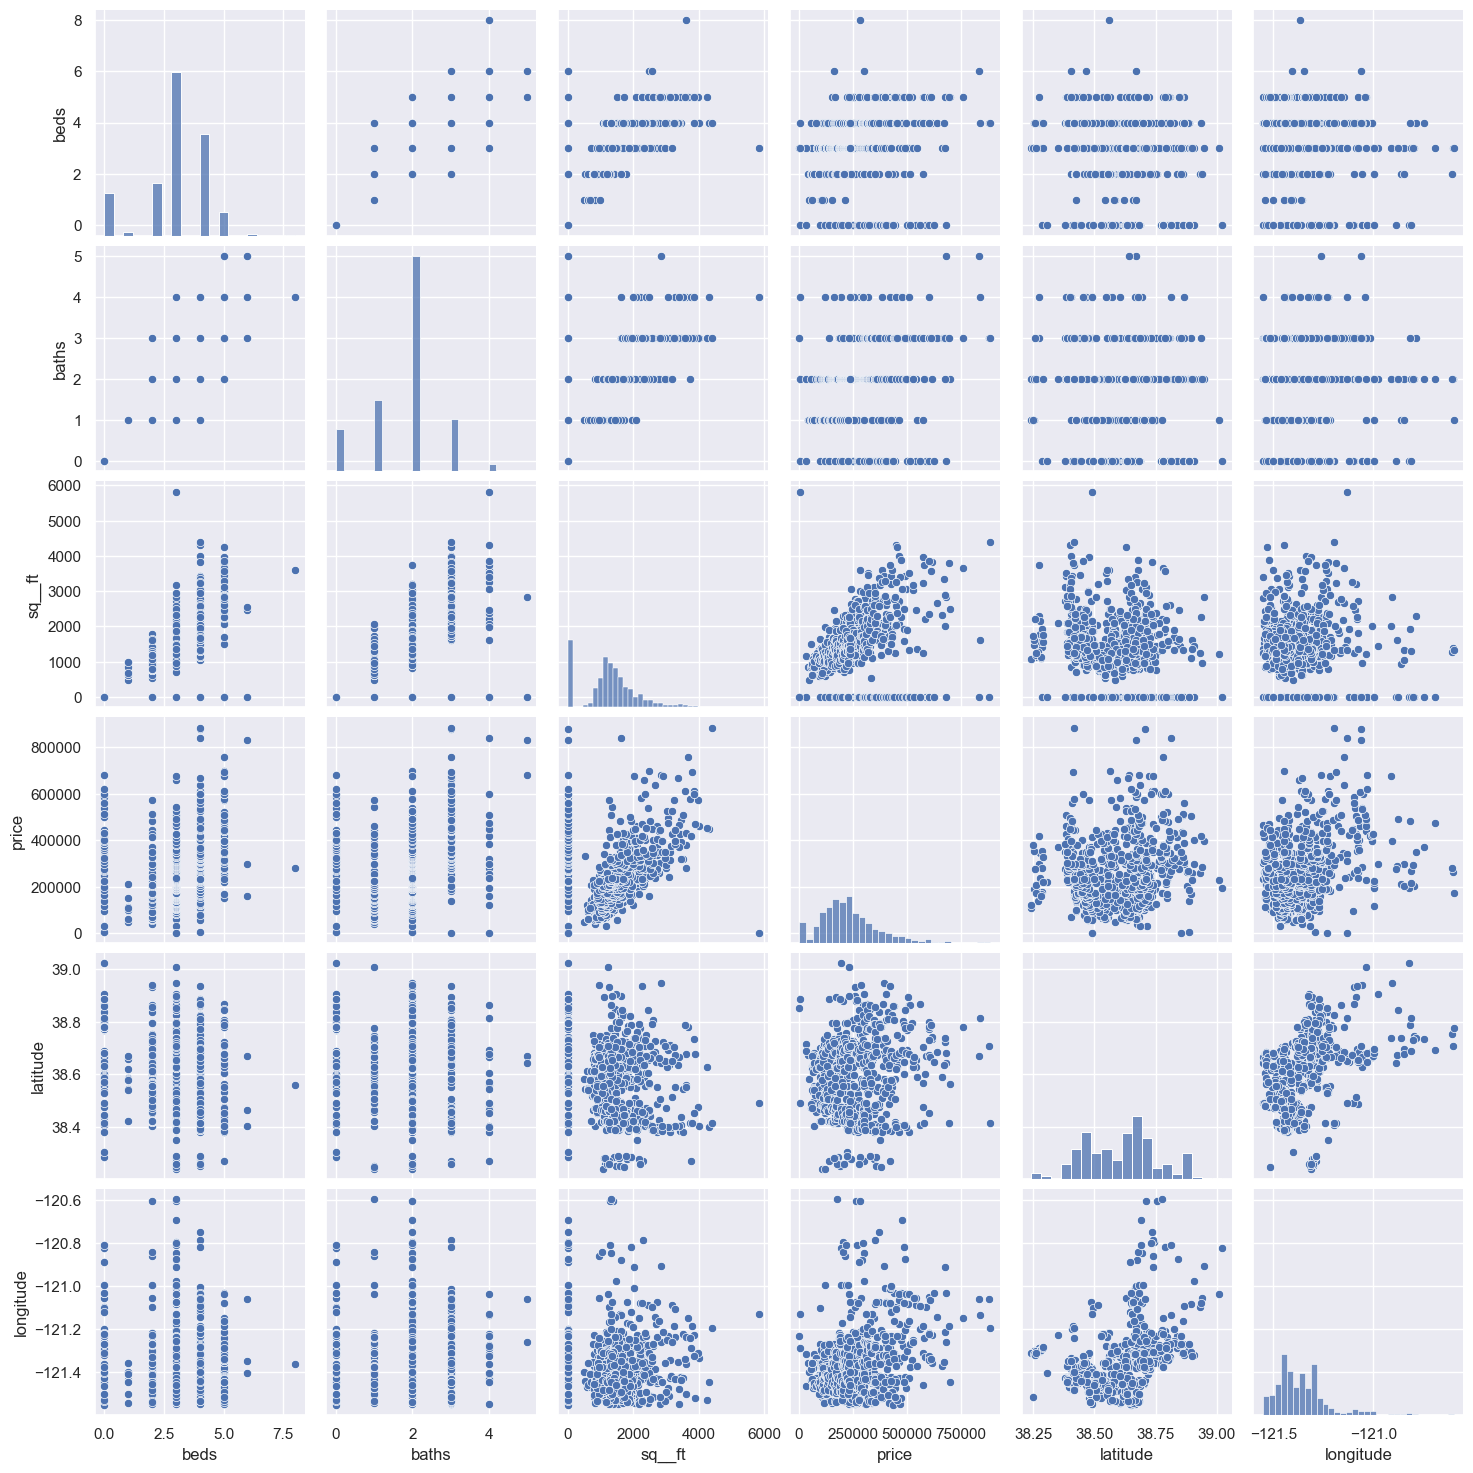

In [326]:
# Plot pairwise relationships in the df
sns.pairplot(df);

Documentation on the data set:
> strongest relationship seems to be between price and sq__ft

In [327]:
# Check types of houses
df.type.value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

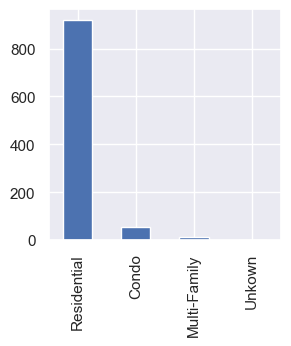

In [328]:
df.type.value_counts().plot(kind='bar', figsize=(3,3));

In [329]:
# Re-assign house type w/ 0 beds to type 'Land'
df.loc[df['beds'] == 0, 'type'] = 'Land'

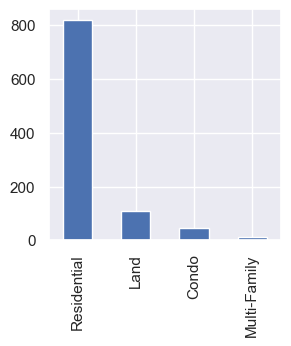

In [330]:
df.type.value_counts().plot(kind='bar', figsize=(3,3));

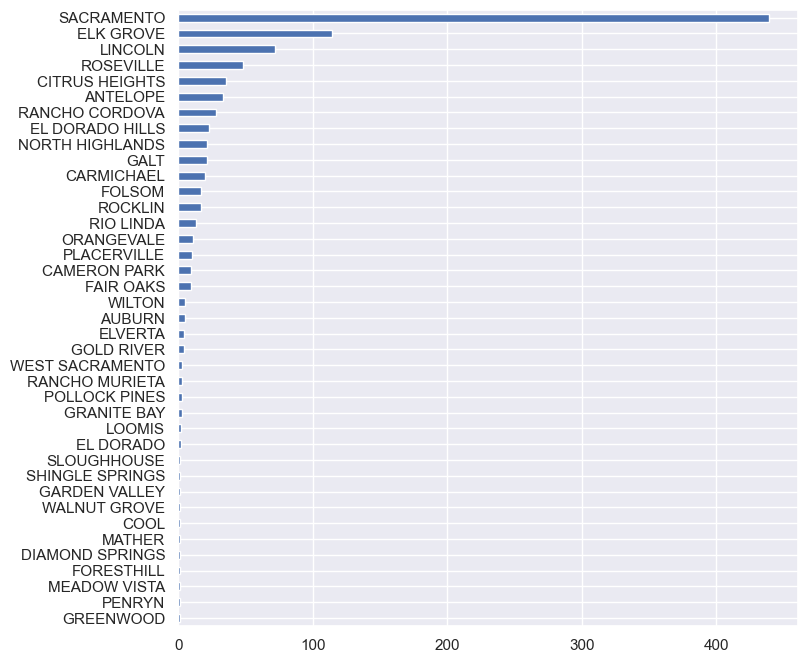

In [331]:
# Plot houses by city/location
df.city.value_counts().sort_values().plot(kind='barh', figsize=(8,8));

In [332]:
# Plot location of houses on a map

import folium

# Function from Lab 2.1.2
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location,
        control_scale = True,
        zoom_start = default_zoom_start,
        width = 500, #width of displayed map
        height = 500 #height of displayed map
    )
    
    return base_map

In [333]:
sacramento = [38.631481, -121.501880]
base_map = generateBaseMap(default_location = sacramento, default_zoom_start = 9)

# Add markers to map
for i in range(0, len(df.head(100))):
    folium.Marker(location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']], popup=df.iloc[i]['type']).add_to(base_map) #location, popup
display(base_map)

In [334]:
# Subset df for city Sacramento
df_sac = df[df['city'] == 'SACRAMENTO']
df_sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [335]:
df_sac.city.value_counts()

SACRAMENTO    439
Name: city, dtype: int64

In [336]:
sacramento = [38.631481, -121.501880]
base_map = generateBaseMap(default_location = sacramento, default_zoom_start = 9)

# Add markers to map
for i in range(0, len(df_sac.head(100))):
    folium.Marker(location=[df_sac.iloc[i]['latitude'], df_sac.iloc[i]['longitude']], popup=df_sac.iloc[i]['type']).add_to(base_map) #location, popup
display(base_map)

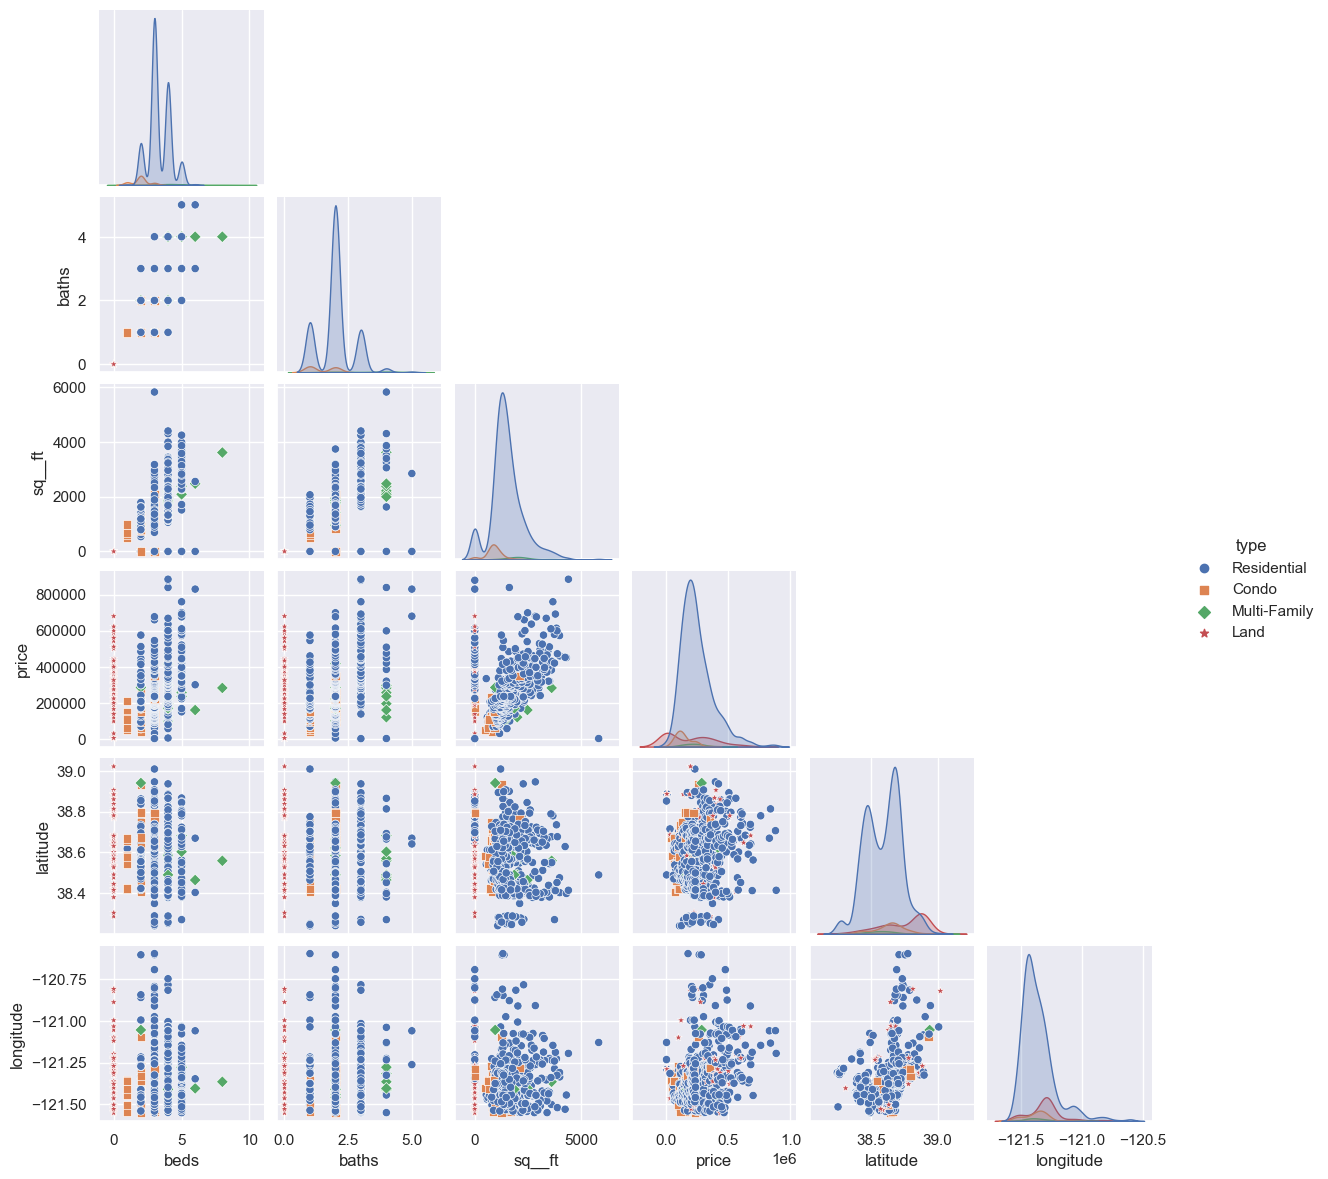

In [337]:
# Plot pairwise relationships in the df
sns.pairplot(df, hue='type', corner=True, height=2, markers=["o", "s", "D","*"]);

Documentation on the data set:
>Note! Not all properties w/ '0' sq_ft are of type 'Land'

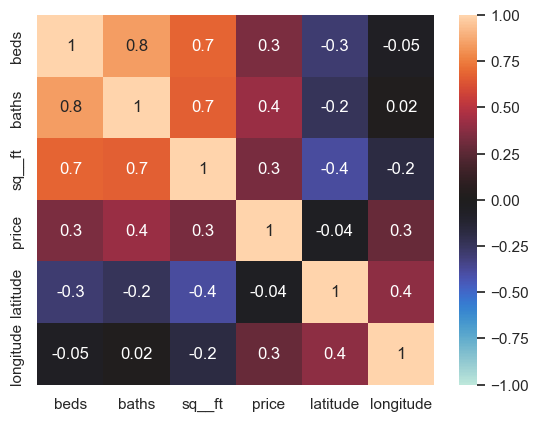

In [338]:
# Plot correlation between variables
sns.heatmap(df.corr(), fmt='.1g', annot=True, vmin=-1, vmax=1, center=0);
#fmt: formatting string

Documentation on the data set:
> Correlation between price and sqft only 0.3, probably due to the '0' sq_ft values

In [339]:
# Prepare data for boxplot plotting
boxplot_columns = df.iloc[:, [4,5,6,9]]
boxplot_columns.columns

Index(['beds', 'baths', 'sq__ft', 'price'], dtype='object')

In [340]:
for i, col in enumerate(boxplot_columns.columns):
    print(i, col)

0 beds
1 baths
2 sq__ft
3 price


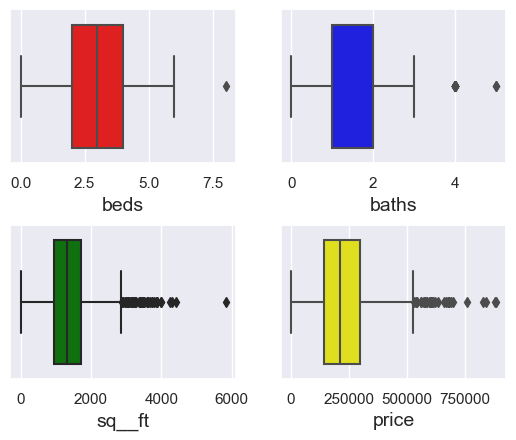

In [341]:
colors = ['red','blue','green','yellow']

for i, col in enumerate(boxplot_columns.columns):
    sns.set()
    plt.subplot(2, 2, i+1) # nrows, ncols, index
    sns.boxplot(x=col, data=df, color=colors[i])
    plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.4)
    
# Note! Here subplot(), not subplots(2,2) is used    

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [342]:
# ANSWER

# Price is the target variable:
Y = df['price']

#### 2.2 List all possible variables which might be Predictor variable.

In [343]:
# ANSWER

# Possible predictor variables are: beds, baths, sq__ft, type
X = df[['beds', 'baths', 'sq__ft']]

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

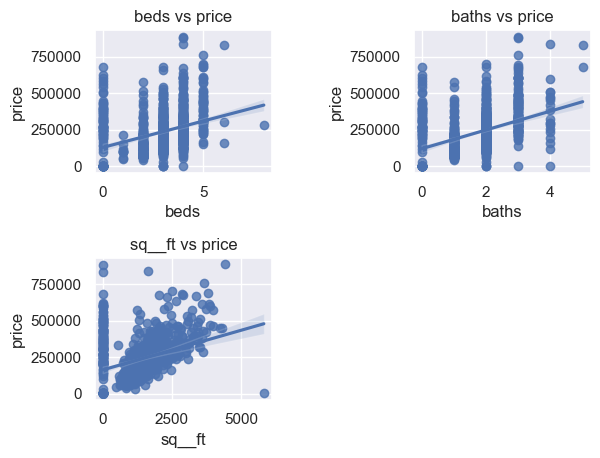

In [344]:
# ANSWER

for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1) # nrows, ncols, index
    sns.regplot(x=col, y='price', data=df)
    plt.subplots_adjust(hspace=0.6)
    plt.subplots_adjust(wspace=0.8)
    plt.title(f'{col} vs price')

Documentation on the data set:
> sqft is best predictor

> remove '0' values from sqft before modelling

In [345]:
df.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [346]:
# Remove type 'Land'
df2 = df[df.type != 'Land']

In [347]:
df2.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.659514,0.497661,0.450966,-0.055823,0.077586
baths,0.659514,1.000000,0.478494,0.524377,-0.004684,0.156539
sq__ft,0.497661,0.478494,1.000000,0.361688,-0.279127,-0.138554
price,0.450966,0.524377,0.361688,1.000000,0.131900,0.354499
latitude,-0.055823,-0.004684,-0.279127,0.131900,1.000000,0.392111
longitude,0.077586,0.156539,-0.138554,0.354499,0.392111,1.000000


Documentation on the data set:
> Removing 'Land' increased correlation only slightly for beds, baths, sq_ft

In [348]:
# Remove sq_ft = 0
df3 = df2[df2.sq__ft != 0]

In [349]:
df3.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


Documentation on the data set:
> Removing sq_ft = 0 increased R2 to 0.7 for price vs sq_ft

> sqft is best predictor

> remove '0' values from sqft before modelling

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [350]:
# ANSWER
# Mean of price
df.price.mean()

234144.26395939087

In [351]:
df['y_hat_mean'] = df.price.mean() #y_hat_mean: predicted price
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat_mean
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959


In [352]:
X = df['sq__ft'] #predictor variable, '0' values not removed
Y = df['price'] #target variable
Yhat = df['y_hat_mean']
Yhat[:4]

0    234144.263959
1    234144.263959
2    234144.263959
3    234144.263959
Name: y_hat_mean, dtype: float64

In [353]:
def draw_plot(X, Y, Yhat):
    """
    Function to plot data 
    """
        
    # Generate a figure object using plt which will automatically create an axes object behind the scenes
    fig = plt.figure() 
        
    # Access axis object using the figure object’s “gca” method, which stands for “get current axes”
    ax = plt.gca() 
    
    # Use the Axes object to generate the plot
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

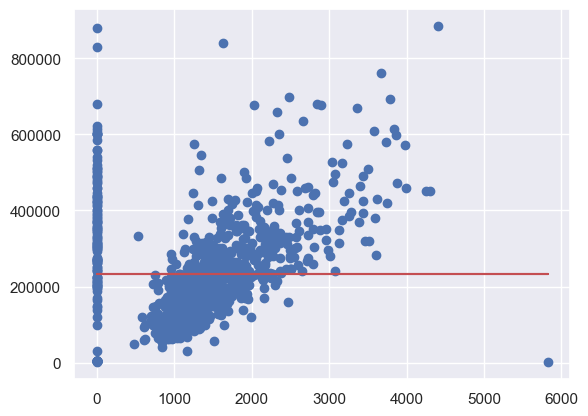

In [354]:
draw_plot(X, Y, Yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [355]:
# ANSWER

# Mean residuals
res = abs(df['price'] - df['y_hat_mean']).mean() #abs: absolute value
res

103452.16956891476

In [356]:
abs(df['price'] - df['y_hat_mean'])

0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [357]:
# ANSWER 
Y = df['price']
X = df['sq__ft']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [358]:
# ANSWER
def calculate_beta_1(X, Y):
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
 
    n = np.sum((Y - y_bar) * (X - x_bar)) #numerator
    d = np.sum(np.square(X - x_bar)) #denominator

    beta_1 = n/d

    return beta_1 

In [359]:
beta_1 = calculate_beta_1(X, Y)
beta_1 #slope 54

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [360]:
# ANSWER
def calculate_beta_0(X, Y):
    x_bar = X.mean()
    y_bar = Y.mean()
    
    beta_0 = y_bar - calculate_beta_1(X, Y) * x_bar
    
    return beta_0    

In [361]:
beta_0 = calculate_beta_0(X, Y)
beta_0 #about 162k

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [362]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [363]:
df['y_hat_linreg'] = calculate_yhat(X, beta_0, beta_1)
Yhat = df['y_hat_linreg']

In [364]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat_mean,y_hat_linreg
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,208206.784187
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,226133.293924
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,206040.438599
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,209073.322422
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,206094.597239


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [365]:
# ANSWER
def calculate_res(Y, Yhat):
    res = Y - Yhat
    return res

In [366]:
res = abs(calculate_res(df.price, df.y_hat_linreg))
res

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [367]:
# ANSWER
def calculate_total_sum_of_square(Y):
    y_bar = np.mean(Y)
    SStot = np.square(Y - y_bar)
    SStot = np.sum(SStot)
    return SStot

In [368]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [369]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    R_squared = 1 - (SSres/SStot)
    return R_squared

In [370]:
calculate_r_square(Y, np.mean(Y))

0.0

In [371]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

In [372]:
# How good is my mode? R2 values
# 0.6 okay
# 0.7 good
# 0.8 excellent
# 0.9 amazing

##### 2.7.F [BONUS] Draw Plot of Predicted Line

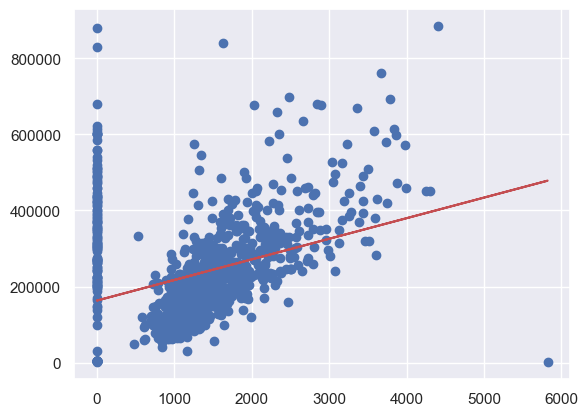

In [373]:
# ANSWER
draw_plot(X, Y, Yhat) #Yhat: df['y_hat_linreg']

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

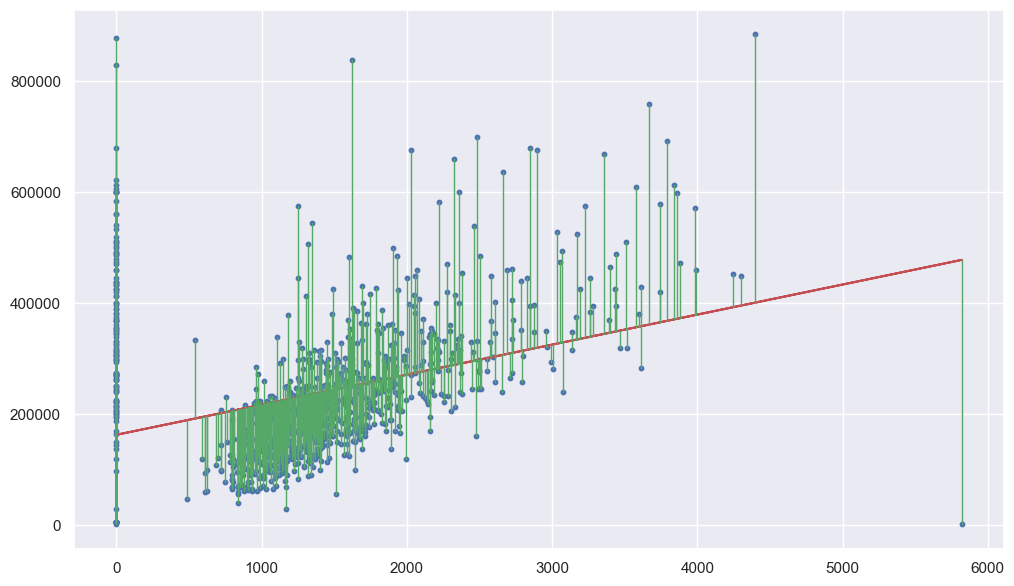

In [374]:
# ANSWER

# Create a residuals plot
fig = plt.figure(figsize=(12,7))
ax = plt.gca()

ax.scatter(x=X, y=Y, c='b', s=10)
ax.plot(X, Yhat, color='r')

for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['y_hat_linreg']), 'g-', linewidth=1)
    
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [375]:
# ANSWER
xpred = 1204
xpred

1204

In [376]:
beta_0

162930.16140699777

In [377]:
beta_1

54.158639688530755

In [378]:
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



